<a href="https://colab.research.google.com/github/minhnguyentk95/Exploring-consumer-behavior/blob/main/MinhNguyen_Final_Project_Exploring_consumer_behavior_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Set up environment and Load data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install folium --upgrade

In [ ]:
pip install plotly==5.6.0 

In [ ]:
# Standard libs
import pandas as pd
import numpy as np
from datetime import datetime
import os
# Seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
# Plotly library
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools

In [ ]:
##Read all files
customers = pd.read_csv('/content/drive/MyDrive/data-ecom/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/data-ecom/olist_geolocation_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/data-ecom/olist_orders_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/data-ecom/olist_order_items_dataset.csv')
payments = pd.read_csv('/content/drive/MyDrive/data-ecom/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/drive/MyDrive/data-ecom/olist_order_reviews_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/data-ecom/olist_products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/data-ecom/olist_sellers_dataset.csv')
product_category = pd.read_csv('/content/drive/MyDrive/data-ecom/product_category_name_translation.csv')

**Task 2: CUSTOMER BEHAVIOR**

In [ ]:
os.listdir('/content/drive/MyDrive/data-ecom/') ## import os lấy quyền máy tính, listdir tập tin để lấy tên của từng file csv

['product_category_name_translation.csv',
 'olist_sellers_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_products_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_geolocation_dataset.csv']

In [ ]:
#Merge Data 
data_merge=pd.merge(orders,order_items,on='order_id',how='inner')
data_merge=pd.merge(data_merge,payments,on='order_id',how='inner')
data_merge=pd.merge(data_merge,order_reviews,on='order_id',how='inner')
data_merge=pd.merge(data_merge,products,on='product_id',how='inner')
data_merge=pd.merge(data_merge,customers,on='customer_id',how='inner')
data_merge=pd.merge(data_merge,sellers,on='seller_id',how='inner')
data_merge=pd.merge(data_merge,product_category,on='product_category_name',how='inner')

**How many orders we have for each status?**

In [ ]:
# Collections for each dataset
datasets = [customers, geolocation, orders, order_items, payments,
            order_reviews, products, sellers]
names = ['olist_customer', 'olist_geolocation', 'olist_orders', 'olist_order_items', 'olist_order_payments',
         'olist_order_reviews', 'olist_products', 'olist_sellers']

In [ ]:
# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info

,dataset,n_rows,n_cols,null_amount,qty_null_columns,null_columns
0,olist_customer,99441,5,0,0,
1,olist_geolocation,1000163,5,0,0,
2,olist_orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_dat..."
3,olist_order_items,112650,7,0,0,
4,olist_order_payments,103886,5,0,0,
5,olist_order_reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
6,olist_products,32951,9,2448,8,"product_category_name, product_name_lenght, pr..."
7,olist_sellers,3095,4,0,0,


In [ ]:
#Total no. of unique orders and products
data_info.describe(include = 'all')

,dataset,n_rows,n_cols,null_amount,qty_null_columns,null_columns
count,8,8.000000e+00,8.000000,8.000000,8.000000,8
unique,8,NaN,NaN,NaN,NaN,4
top,olist_customer,NaN,NaN,NaN,NaN,
freq,1,NaN,NaN,NaN,NaN,5
mean,NaN,1.938564e+05,6.250000,19157.375000,1.625000,NaN
std,NaN,3.281732e+05,1.752549,51244.130593,2.825269,NaN
min,NaN,3.095000e+03,4.000000,0.000000,0.000000,NaN
25%,NaN,8.265575e+04,5.000000,0.000000,0.000000,NaN
50%,NaN,9.944100e+04,6.000000,0.000000,0.000000,NaN
75%,NaN,1.060770e+05,7.250000,3063.000000,2.250000,NaN


**Where the most Customers come from?**

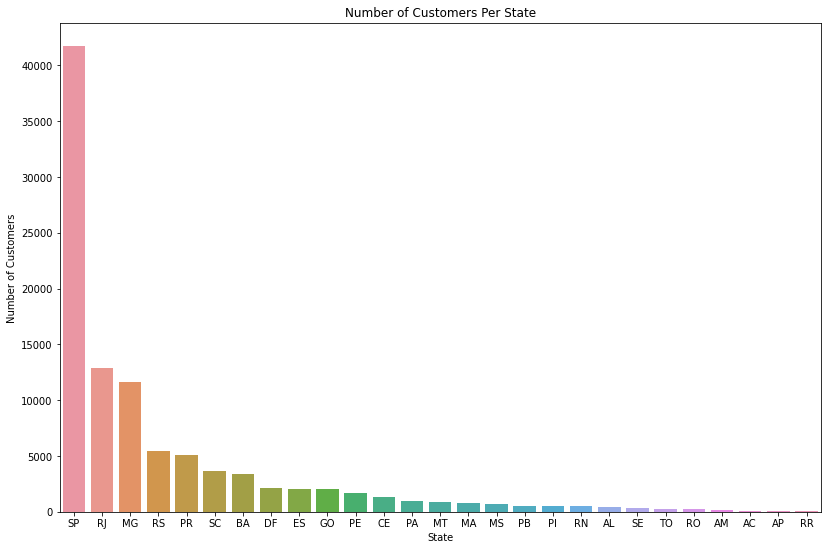

In [ ]:
state_df = customers.groupby('customer_state').count()['customer_id'].reset_index()
city_df = customers.groupby('customer_city').count()['customer_id'].reset_index()

plt.figure(figsize = (30,9))

plt.subplot(121)

sns.barplot(data = state_df.sort_values('customer_id', ascending = False), x = 'customer_state', y = 'customer_id')
plt.title('Number of Customers Per State')
plt.xlabel('State')
plt.ylabel('Number of Customers')

plt.savefig('Number of Customers Per State.png', dpi=400, bbox_inches='tight')#saving lại hình

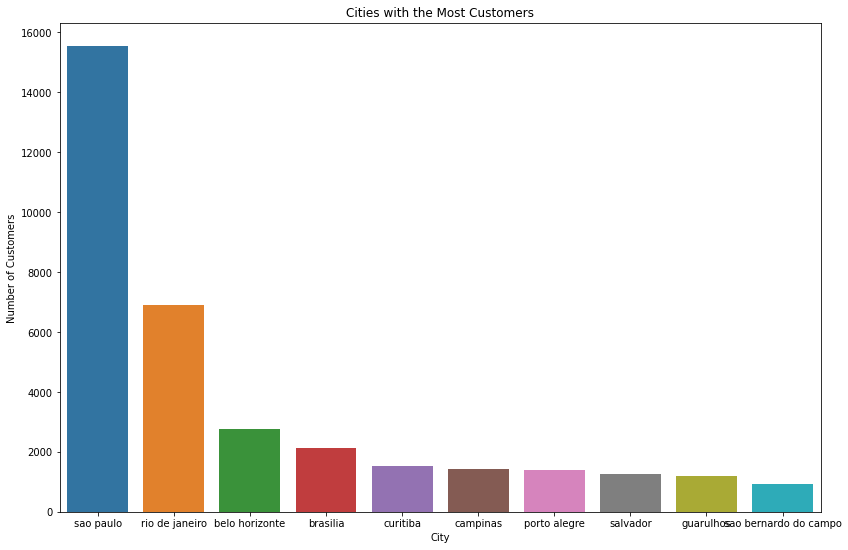

In [ ]:
plt.figure(figsize = (30,9))
plt.subplot(122)

sns.barplot(data = city_df.sort_values('customer_id', ascending = False).nlargest(10,'customer_id'), y = 'customer_id', x = 'customer_city')
plt.title('Cities with the Most Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers');

plt.savefig('Cities with the Most Customers.png', dpi=400, bbox_inches='tight')#saving lại hình

**Top 5 cities having the largest total Revenue**

In [ ]:
Df_data=data_merge.drop_duplicates(['order_id'])
Top5city_rev=Df_data['price'].groupby(Df_data['customer_city']).sum().sort_values(ascending=False)[:5]

#Crate new index "other cities" euqally to the rest of other cities
Top5city_rev['other cities']=Df_data['price'].groupby(Df_data['customer_city']).sum().sort_values(ascending=False)[5:].sum()

#Create DataFrame and rename 
Top5city_rev=pd.DataFrame(data=Top5city_rev).rename(columns={'price':'Total revenue'})

#Calling new DataFrame
Top5city_rev

,Total revenue
customer_city,
sao paulo,1698154.00
rio de janeiro,872826.35
belo horizonte,322030.69
brasilia,275420.36
curitiba,189527.79
other cities,8783774.96


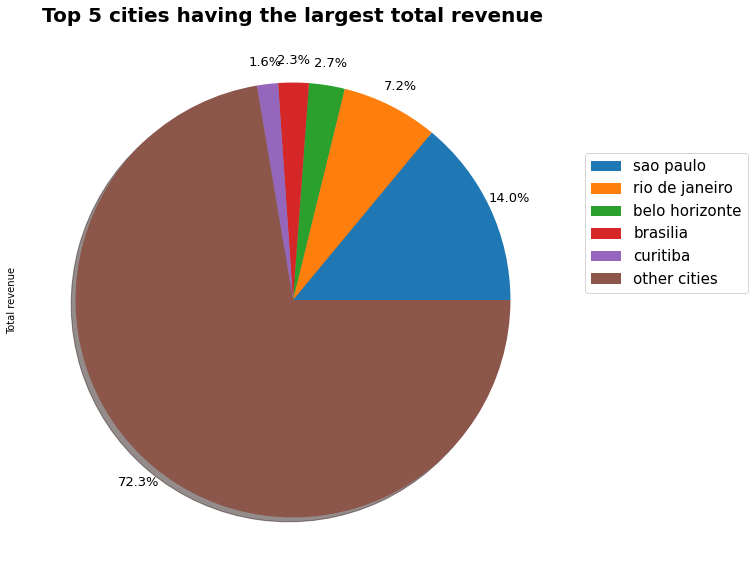

<Figure size 432x288 with 0 Axes>

In [ ]:
Top5city_rev.plot.pie(y='Total revenue',autopct='%1.1f%%',shadow=True,figsize=(10,10),legend=True,textprops={'size': 13}, labeldistance=None,pctdistance=1.1)
plt.legend(loc='lower right',bbox_to_anchor=(1.35,0.5),fontsize=15)
plt.title('Top 5 cities having the largest total revenue',fontsize=20,weight='bold')
plt.show()

plt.savefig('Top 5 cities having the largest total Revenue.png', dpi=400, bbox_inches='tight')#saving lại hình

**What is the most frequent items customers bought?**

In [ ]:
#Merge DF items and product
product_order_merge_df = pd.merge(order_items,products)
product_order_merge_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


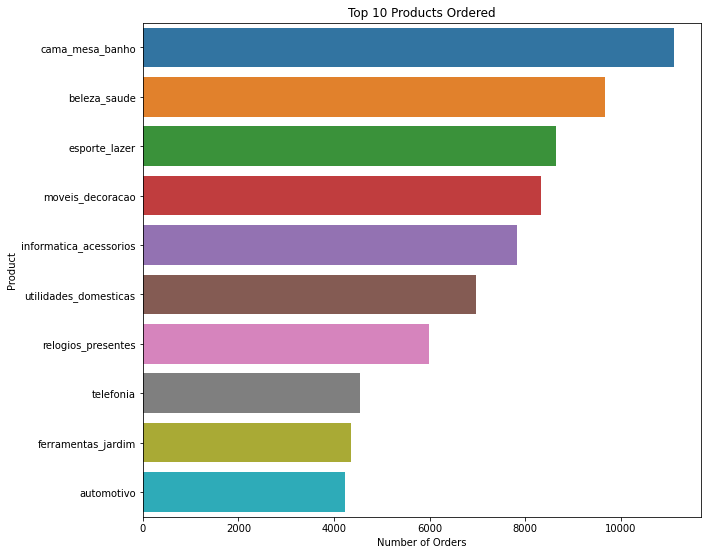

In [ ]:
top_products = product_order_merge_df['product_category_name'].value_counts().reset_index().nlargest(10,'product_category_name')
lowest_products = product_order_merge_df['product_category_name'].value_counts().reset_index().nsmallest(10,'product_category_name')

plt.figure(figsize = (10,20))

plt.subplot(211)
sns.barplot(data = top_products, x = 'product_category_name', y = 'index')
plt.title('Top 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product');

plt.savefig('Top 10 Product Ordered.png', dpi=400, bbox_inches='tight')#saving lại hình

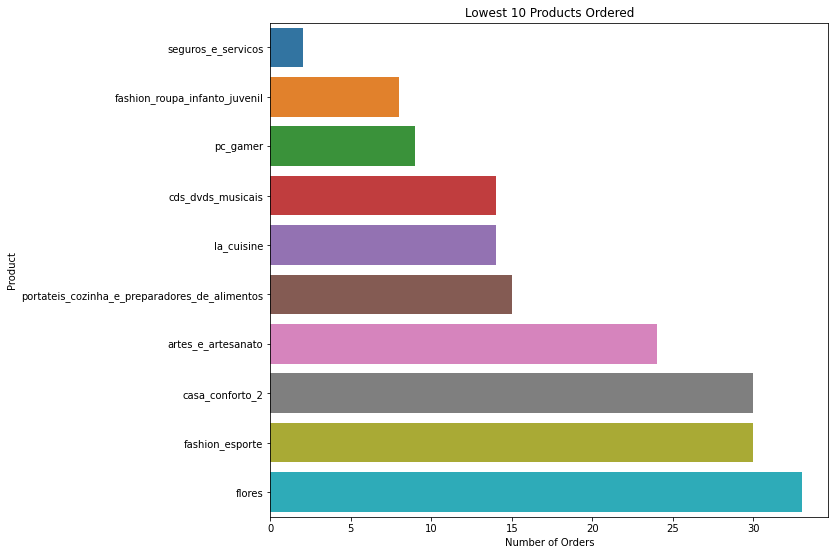

In [ ]:
plt.figure(figsize = (10,20))

plt.subplot(212)
sns.barplot(data = lowest_products, x = 'product_category_name', y = 'index')
plt.title('Lowest 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product');

plt.savefig('Lowest 10 Products Ordered.png', dpi=400, bbox_inches='tight')#saving lại hình

**What are the most common payment types?**

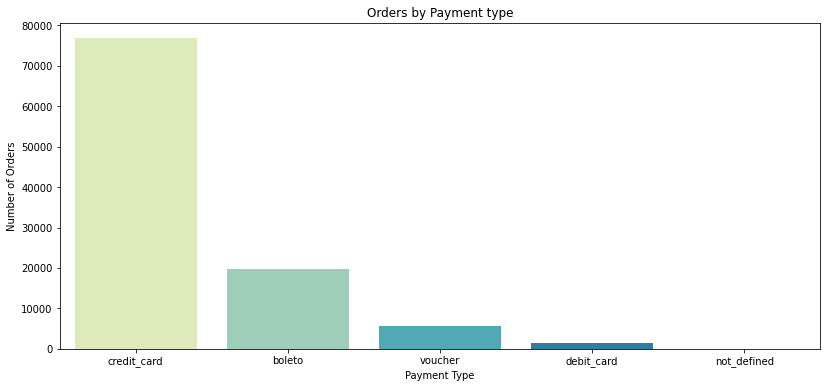

In [ ]:
payments_types = payments['payment_type'].value_counts().reset_index()

plt.figure(figsize = (30,6))

plt.subplot(121)
sns.barplot(data = payments_types, x = 'index', y = 'payment_type', palette = 'YlGnBu')
plt.title('Orders by Payment type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders');

plt.savefig('The most common payment types', dpi=400, bbox_inches='tight')#saving lại hình

**What are the top 15 most rated products?**

In [ ]:
#Merge order and review df
product_reviews = pd.merge(product_order_merge_df,order_reviews)

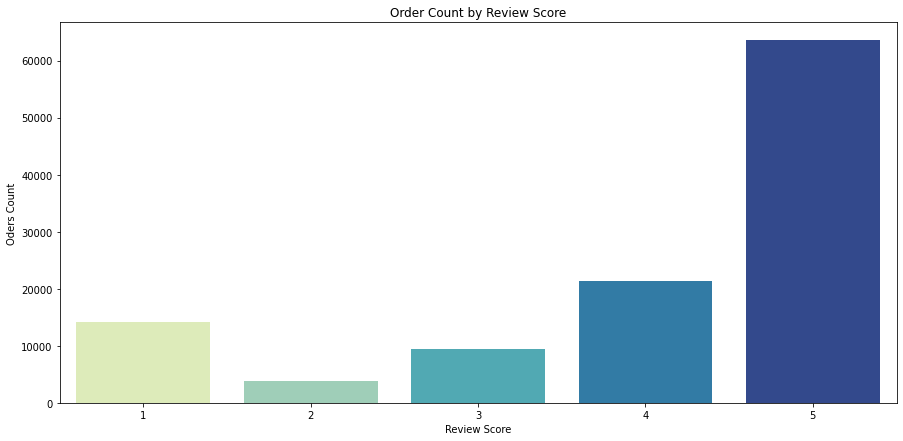

In [ ]:
#Order Count by Review Score
plt.figure(figsize = (15,7))
sns.barplot(data = product_reviews.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', palette = 'YlGnBu')
plt.title('Order Count by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Oders Count');


**Top 15 Product Ratings**

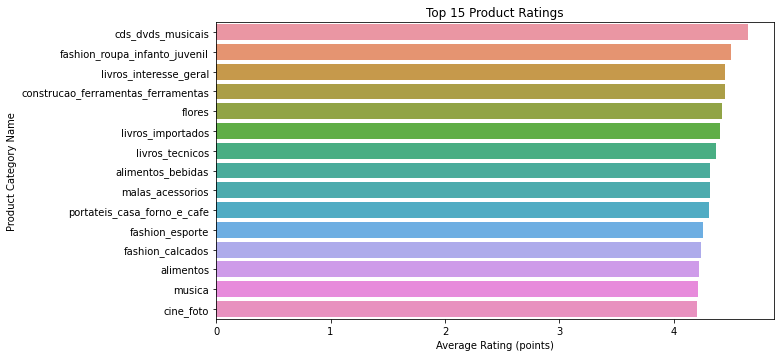

In [ ]:
prd_rev_means = product_reviews.groupby('product_category_name').mean()['review_score'].reset_index()
top_10_ratings = prd_rev_means.sort_values('review_score', ascending = False).nlargest(15,'review_score')
lowest_10_ratings = prd_rev_means.sort_values('review_score', ascending = False).nsmallest(15,'review_score')



plt.figure(figsize = (10,12))

sns.barplot(data = product_reviews.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', palette = 'YlGnBu')
plt.title('Order Count by Review Score')
plt.xlabel('Order Count')
plt.ylabel('Review Score');

plt.subplot(211)
sns.barplot(data = top_10_ratings, x = 'review_score', y = 'product_category_name')
plt.title('Top 15 Product Ratings')
plt.xlabel('Average Rating (points)')
plt.ylabel('Product Category Name');

plt.savefig('Top 15 Product Ratings.png', dpi=400, bbox_inches='tight')#saving lại hình

**Top 15 Lowest Product Ratings**

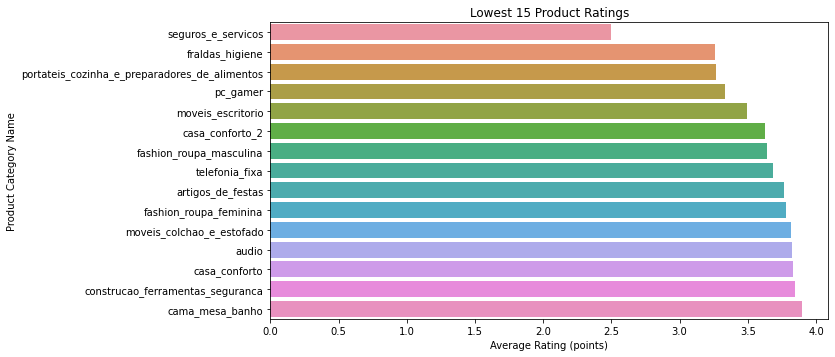

In [ ]:
plt.figure(figsize = (10,12))
plt.subplot(212)
sns.barplot(data = lowest_10_ratings, x = 'review_score', y = 'product_category_name')
plt.title('Lowest 15 Product Ratings')
plt.xlabel('Average Rating (points)')
plt.ylabel('Product Category Name');
plt.savefig('Top 15 Product Ratings.png', dpi=400, bbox_inches='tight')#saving lại hình

**Top 15 product category having the largest revenue**

In [ ]:
df_top15prod_rev=Df_data['price'].groupby(Df_data['product_category_name_english']).sum().sort_values(ascending=False)[:15]
df_top15prod_rev

product_category_name_english
health_beauty            1180521.71
watches_gifts            1159158.42
sports_leisure            908372.81
bed_bath_table            880781.42
computers_accessories     776842.09
cool_stuff                609728.11
furniture_decor           602770.14
housewares                560353.29
auto                      543873.17
toys                      460837.30
garden_tools              422370.03
baby                      397201.65
perfumery                 380248.99
telephony                 297812.84
stationery                215960.69
Name: price, dtype: float64

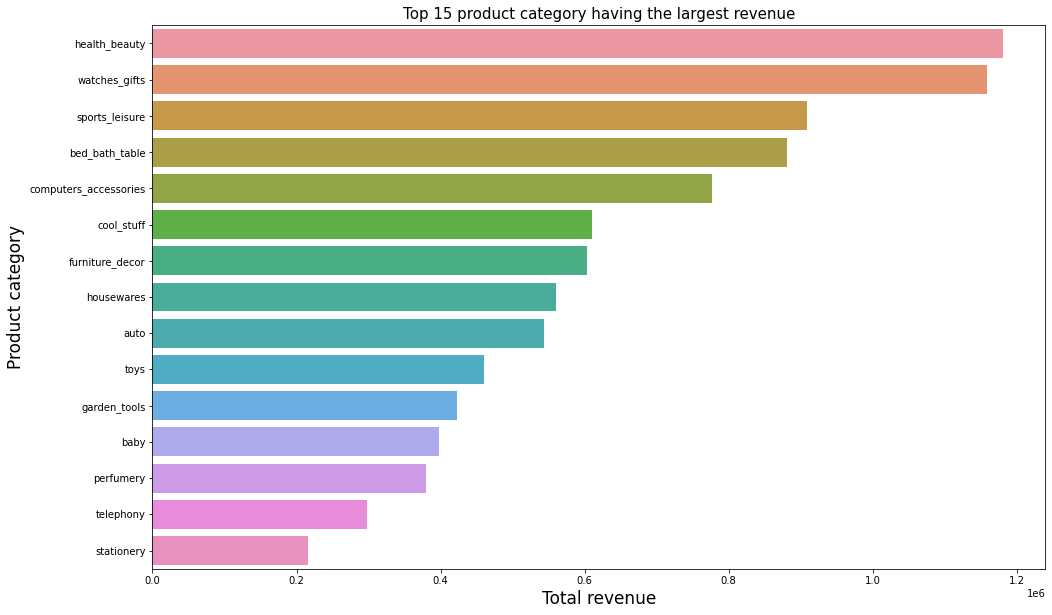

In [ ]:
fig=plt.figure(figsize=(16,10))
sns.barplot(y=df_top15prod_rev.index,x=df_top15prod_rev.values)
plt.title('Top 15 product category having the largest revenue',fontsize=15)
plt.xlabel('Total revenue',fontsize=17)
plt.ylabel('Product category',fontsize=17)
plt.savefig('Top 15 Product Category having the largest revenue.png', dpi=400, bbox_inches='tight')#saving lại hình

**Monthly Order in each month/each Year/Each Day**

In [ ]:
#Merge
all_data = orders.merge(order_items, on='order_id', how='left')
all_data = all_data.merge(payments, on='order_id', how='inner')
all_data = all_data.merge(order_reviews, on='order_id', how='inner')
all_data = all_data.merge(products, on='product_id', how='inner')
all_data = all_data.merge(customers, on='customer_id', how='inner')
all_data = all_data.merge(sellers, on='seller_id', how='inner')
all_data = all_data.merge(product_category,on='product_category_name',how='inner')
all_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,NaN,NaN,2018-07-20 00:00:00,1.0,5b668636d65ddf4e4109c6d8fb13ea56,...,2.0,30.0,f84487fed78baf25458828c99a2daa5d,3402,sao paulo,SP,5201,sao paulo,SP,books_imported
115605,1dbff949801376b8795a093d31cfe205,0cbd2df3d6e9d8b1eaf5cfefc44886bc,delivered,2018-05-16 14:50:54,2018-05-16 15:18:42,2018-05-18 12:10:00,2018-05-21 17:14:08,2018-05-28 00:00:00,1.0,90797f195eb7bb9dae050697a25f35ce,...,2.0,23.0,1de8fb735d8252498d9a2f82a68c57e0,9411,ribeirao pires,SP,5201,sao paulo,SP,books_imported
115606,6775b950cdc4da0ce39b261032f92c84,c4d135422be0d4333f506acde8af9419,delivered,2018-06-13 12:19:26,2018-06-13 17:39:14,2018-06-15 13:09:00,2018-06-16 17:48:30,2018-06-28 00:00:00,1.0,3e72533d34a1779d818ac8a73403387c,...,2.0,23.0,5f684afb3d1a02f2787e80cb0eee6e02,2927,sao paulo,SP,5201,sao paulo,SP,books_imported
115607,73d60420cd1a179b2d8887d538efe4c2,65d9213dfa004c17dc126503e106e4a3,delivered,2018-08-07 10:52:58,2018-08-07 11:05:18,2018-08-08 08:31:00,2018-08-22 17:02:23,2018-09-04 00:00:00,1.0,078b7149a32b479d3cbf1649fea0172c,...,14.0,16.0,78275e95a4296105923051e0ad4577b3,65700,bacabal,MA,22745,rio de janeiro,RJ,books_imported


In [ ]:
#Transform type
only_numeric = all_data.select_dtypes(include=['int', 'float'])
only_object = all_data.select_dtypes(include=['object'])
only_time = all_data.select_dtypes(include=['datetime', 'timedelta'])

In [ ]:
# Changing the data type for date columns
df_orders = orders.merge(customers, how='left', on='customer_id')
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])


In [ ]:
# Extracting attributes for purchase date - Year and Month
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017,11,Nov,201711,20171118,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018,2,Feb,201802,20180213,13,1,Tue,21,Night


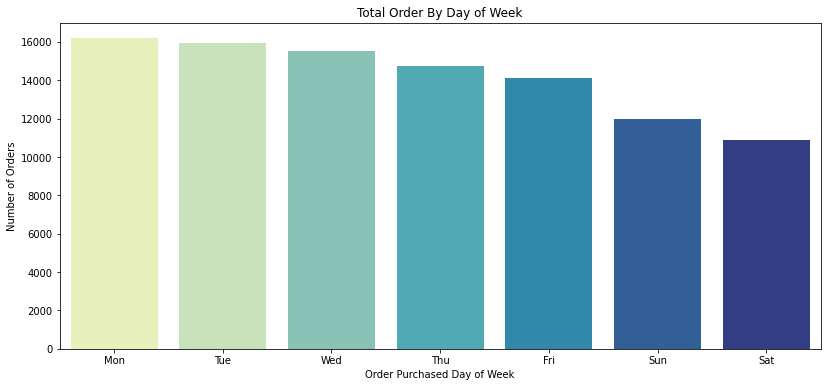

In [ ]:
order_dayofweek = df_orders['order_purchase_dayofweek_name'].value_counts().reset_index()

plt.figure(figsize = (30,6))

plt.subplot(121)
sns.barplot(data = order_dayofweek, x = 'index', y = 'order_purchase_dayofweek_name', palette = 'YlGnBu')

plt.title('Total Order By Day of Week')
plt.xlabel('Order Purchased Day of Week')
plt.ylabel('Number of Orders');
plt.savefig('Order purchase day of week.png', dpi=400, bbox_inches='tight')#saving lại hình

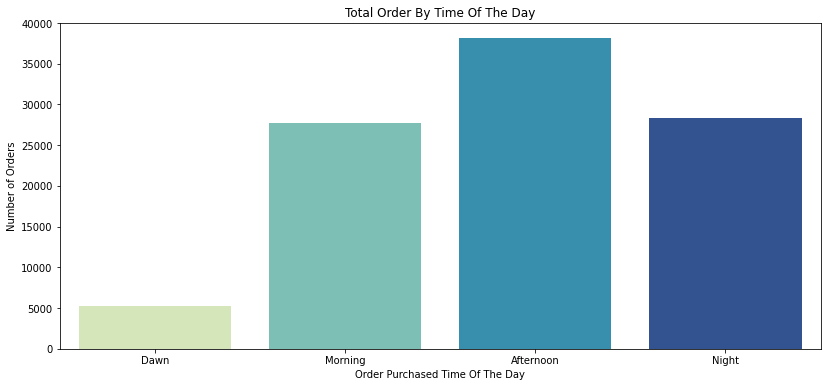

In [ ]:
order_timeday = df_orders['order_purchase_time_day'].value_counts().reset_index()

plt.figure(figsize = (30,6))

plt.subplot(121)
sns.barplot(data = order_timeday, x = 'index', y = 'order_purchase_time_day', palette = 'YlGnBu')

plt.title('Total Order By Time Of The Day')
plt.xlabel('Order Purchased Time Of The Day')
plt.ylabel('Number of Orders');
plt.savefig('Order purchase time day.png', dpi=400, bbox_inches='tight')#saving lại hình

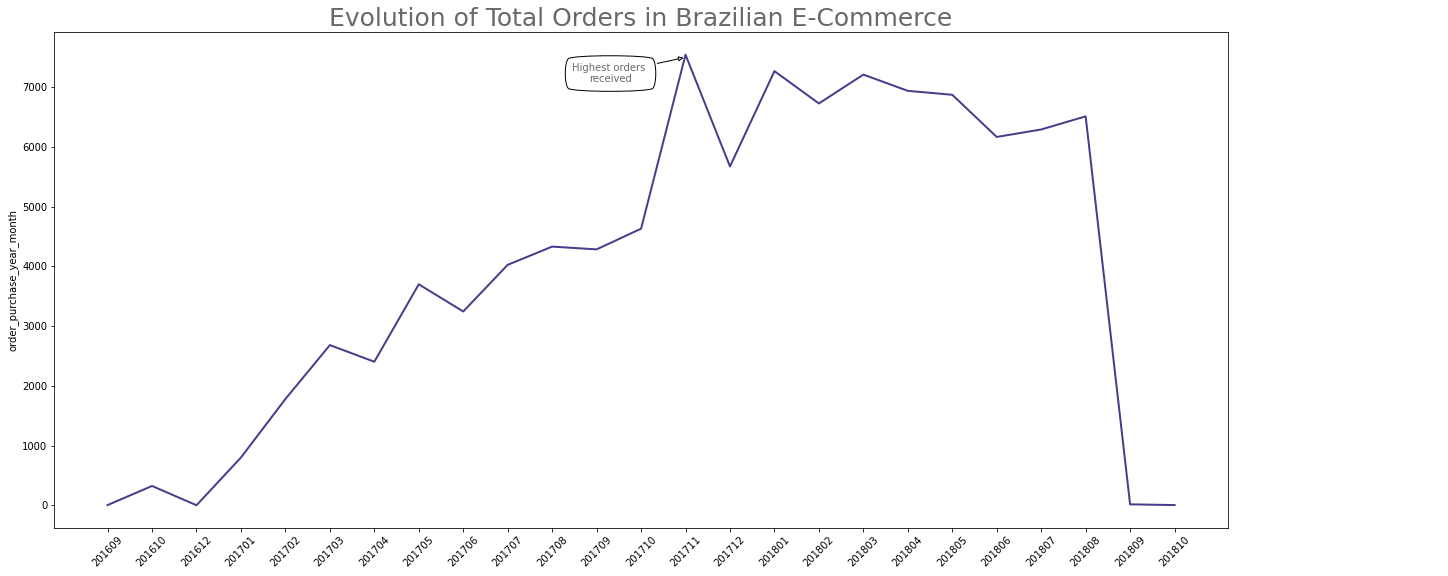

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(20, 15))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=df_orders['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (28, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=25, color='dimgrey')
plt.savefig('Evolution of Total Orders In Brazillian E-commerce.png', dpi=400, bbox_inches='tight')#saving lại hình